# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [3]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [ ]:
x = np.arange(0,100)
y = x*2
z = x**2

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

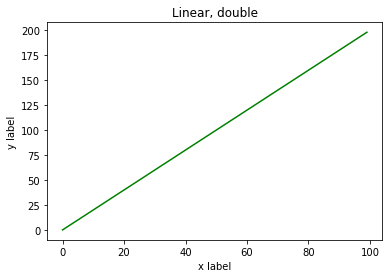

In [ ]:
# Method 1 for (x,y)
# Note: playing with line color and labels
plt.plot(x,y,'g') #'g' changes the line to green
plt.title('Linear, double')
plt.xlabel('x label')
plt.ylabel('y label')
plt.show()

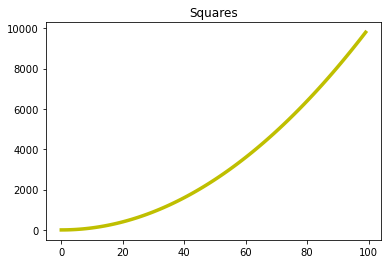

In [ ]:
# Method 1 for (x,z,)
# Note: playing with line width and some labels
plt.plot(x,z,'y', linewidth=3.5) # 'y' sets the color to yellow, 'linewidth=#' changes the linewidth
plt.title('Squares')
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

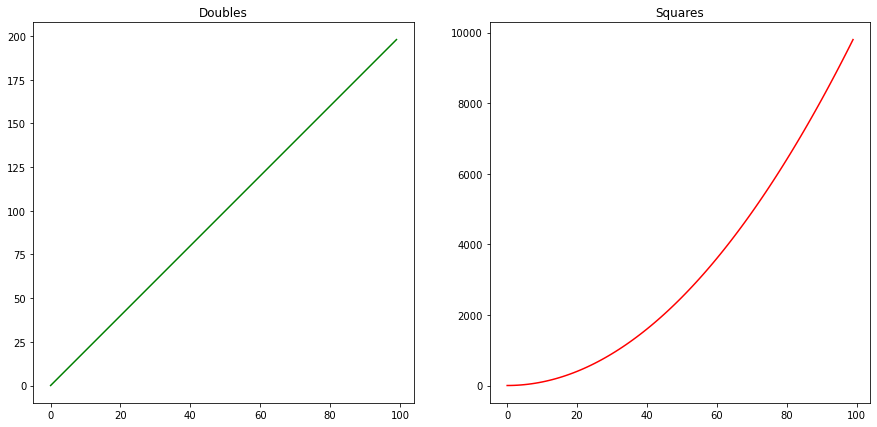

In [ ]:
# Method 2
# Note: I am using figsize to change the size of the subplots, so labels don't overlap
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,7))
ax1.plot(x,y,'g')
ax1.set_title('Doubles')

ax2.plot(x,z,'r')
ax2.set_title('Squares')


plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

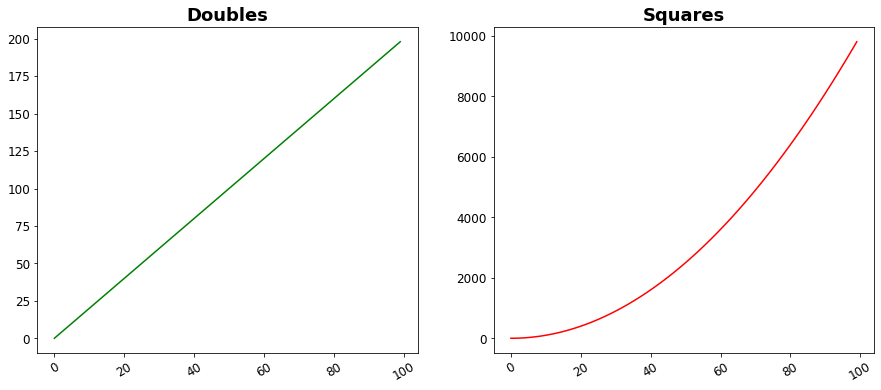

In [ ]:
# Note: I had already changed the figsize in the subplots above. 
# Here I am going to change the labels:
# - First, making the title label bigger and bold (in set_title)
# - Second, making all tick labels bigger (both axis)
# - Third, rotating the tick labels for axis x (not needed for this plot, but just to test)

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,6))
ax1.plot(x,y,'g')
ax1.set_title('Doubles',fontweight="bold", size=18) 
ax1.tick_params(axis='both', labelsize=12)
ax1.tick_params(axis='x', rotation=30)

ax2.plot(x,z,'r')
ax2.set_title('Squares',fontweight="bold", size=18)
ax2.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='x', rotation=30)

plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

/var/folders/ym/cxv9j3js63z_00t5k8szn1ww0000gn/T/ipykernel_43236/2095721970.py:8: RuntimeWarning: divide by zero encountered in log
  y2 = np.log(x)
No handles with labels found to put in legend.


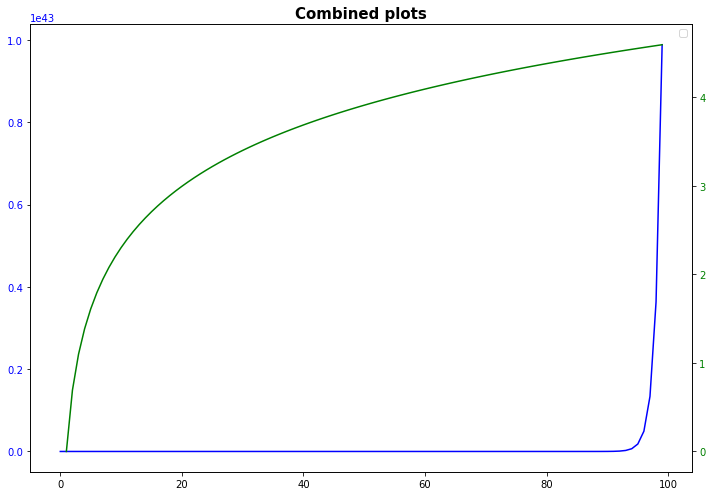

In [4]:
# This one was hard to interpret. I am proposing below a solution, although it does not include the use of set_xscale. 

fig, ax1 = plt.subplots(figsize=(10,7))

x = np.arange(0,100)
y1 = np.exp(x)
y2 = np.log(x)

ax1.set_title('Combined plots',fontweight="bold", size=15) 

ax1.plot(x,y1,'b')
ax1.set_xlabel = ('x label')
ax1.set_ylabel = ('doubles','b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'g')
ax2.set_ylabel = ('squares')
ax2.tick_params(axis='y', labelcolor='g')

fig.tight_layout()
plt.legend()
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [ ]:
fitbit = pd.read_csv('Fitbit2.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

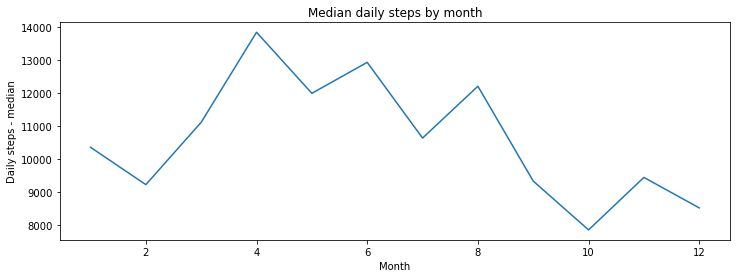

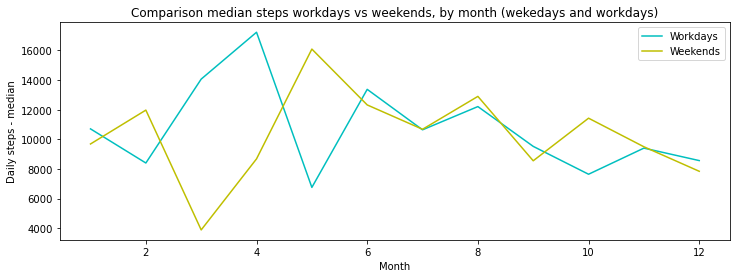

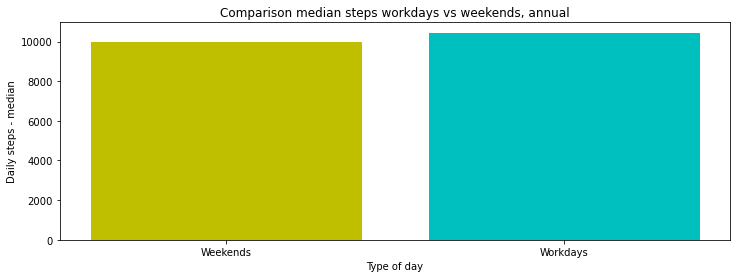

In [ ]:
# Note: because the exercise asks to show the evolution during the months, I am using 
# a linear plot.

# 1. MEDIAN STEPS BY MONTH_ENCODED
median_month = fitbit.groupby(['Months_encoded']).agg({'Steps':['median']}).reset_index()
median_month.index += 1
plt.figure(figsize = (12,4))
plt.plot(median_month['Months_encoded'], median_month['Steps'])
plt.title('Median daily steps by month')
plt.xlabel('Month')
plt.ylabel('Daily steps - median')
plt.savefig('chart1.png')
plt.show()


# 2. MEDIAN STEPS BY WORK_OR_WEEKEND (BY MONTH)
# My interpretation of the exercise is that for the evolution by month above I must now compare 
# workdays vs weekends.
# To achieve this, first I create a new df that only contains the info I need (months, and the median
# of steps for each month both for workdays and for weekends):
median_day = fitbit.where(fitbit['Work_or_Weekend']==1).groupby(['Months_encoded']).agg({'Steps':['median']})
median_day.rename(columns={'Steps':'Workday_steps'},inplace=True)
median_day['Weekend_steps'] = fitbit.where(fitbit['Work_or_Weekend']==0).groupby(['Months_encoded']).agg({'Steps':['median']})
median_day.reset_index(inplace=True)

# Once the df is created, I can create the plot with one line representing each category of day (workday or
# weekend, and its evolution during the 12 months)
plt.figure(figsize = (12,4))
plt.plot(median_day['Months_encoded'], median_day['Workday_steps'],'c', label='Workdays')
plt.plot(median_day['Months_encoded'], median_day['Weekend_steps'],'y', label='Weekends')
plt.title('Comparison median steps workdays vs weekends, by month (wekedays and workdays)')
plt.xlabel('Month')
plt.ylabel('Daily steps - median')
plt.legend()
plt.savefig('chart2.png')
plt.show

# 3. (BONUS) MEDIAN STEPS BY WORK_OR_WEEKEND (TOTAL ALL MONTHS)
# Just in case what we want to compare is workdays vs weekends for the full year (aggregated),
# instead of by month, we can also do that. In this case it would not make sense to use a linear chart
# because there is no evolution, so we could use a bar chart for the comparison between the 2 categories
# of days.
mean_daytipe = fitbit.groupby('Work_or_Weekend').agg({'Steps':'median'}).reset_index()
mean_daytipe['Work_or_Weekend'] = mean_daytipe['Work_or_Weekend'].replace([0],['Weekends']) #rename from 0 to weekend
mean_daytipe['Work_or_Weekend'] = mean_daytipe['Work_or_Weekend'].replace([1],['Workdays']) # rename 1 to workday

plt.figure(figsize = (12,4))
plt.bar(mean_daytipe['Work_or_Weekend'],mean_daytipe['Steps'])
bar_name = plt.bar(mean_daytipe['Work_or_Weekend'],mean_daytipe['Steps'])
bar_name[0].set_color('y')
bar_name[1].set_color('c')
plt.title('Comparison median steps workdays vs weekends, annual')
plt.xlabel('Type of day')
plt.ylabel('Daily steps - median')
plt.savefig('chart3.png')
plt.show()


# ANSWERS:
## We see that the user was more active betweens months 4th to 8th, and the usage declined after August
## During months 3 and 4, the user was much more active on the workdays. During May, it was more active on
## the weekends. The difference between workdays and weekends was not very significant 
## during the rest of the year.
## Overall, for the full year, the user was a bit more active during the workdays.



#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

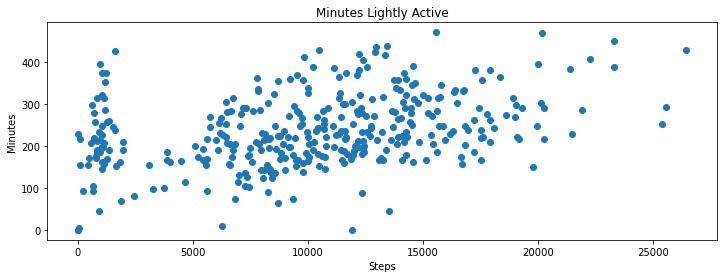

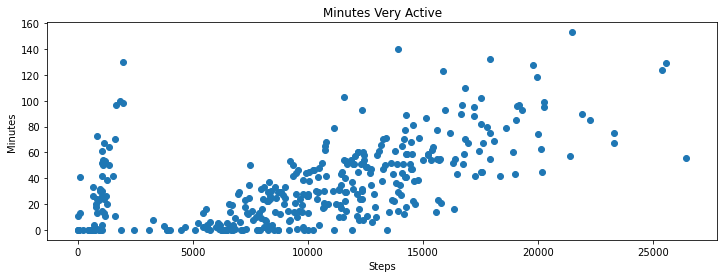

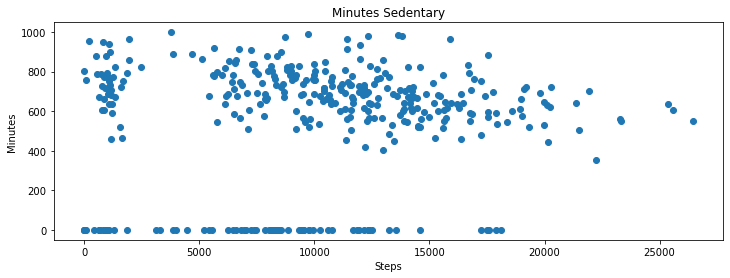

In [ ]:
# First I create a df only with the columns I need
fitbit_df2 = fitbit[['Steps','Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']]
fitbit_df2

#Then I create the loop to be applied to all columns in the new df:
for col in fitbit_df2.columns:
    if not col == 'Steps':  #(we don't want to compare steps with steps, so this column is excluded)
        plt.figure(figsize = (12,4))
        plt.scatter(fitbit_df2['Steps'], fitbit_df2[col])
        plt.title(col)
        plt.xlabel('Steps')
        plt.ylabel('Minutes')
        plt.show()


## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [6]:
titanic = pd.read_csv('titanic.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [ ]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [ ]:
# Numerical variables
titanic.select_dtypes('number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [ ]:
# Categorical values
titanic.select_dtypes('object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [10]:
plt.style.use('classic')
plt.rcParams['figure.figsize'] = [12.0, 6.0]

#### Use the right visulalization to show the distribution of column `Age`.

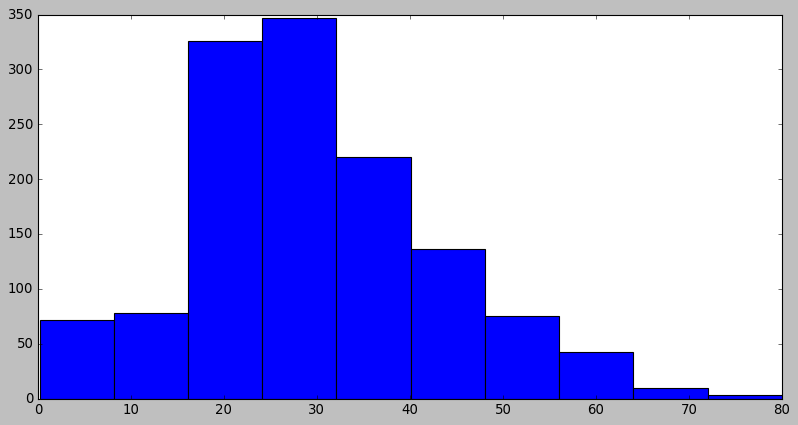

In [ ]:
plt.hist(titanic['Age'])
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [ ]:
# First, just to check, we can see how many values there are inside each of the suggested bins:
bins = pd.cut(titanic['Age'], [0,10,20,50])
bins.value_counts()

(20, 50]    940
(10, 20]    181
(0, 10]      89
Name: Age, dtype: int64

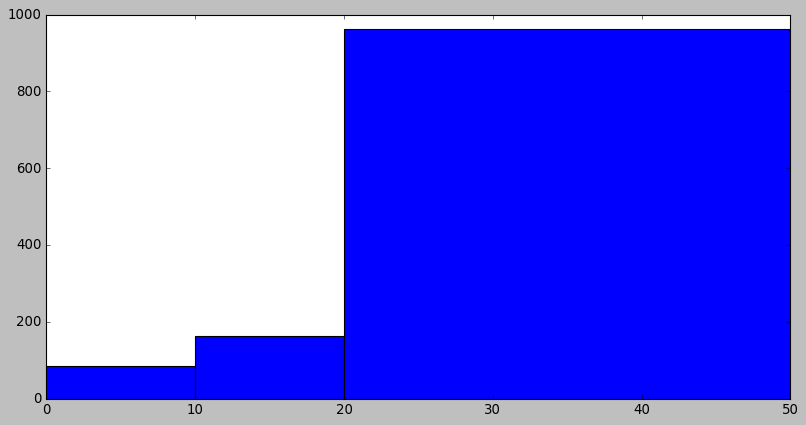

In [ ]:
# Then we can create a new histogram with the required bins (in this solution subplots are not used, but we could also apply them)
plt.hist(titanic['Age'], bins = [0,10,20,50])
plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
Having bins that are not equally distributed, and that include too many values (e.g. the bin 20-50)
makes it harder to get relevant insights. 
"""

#### Use seaborn to show the distribution of column `Age`.

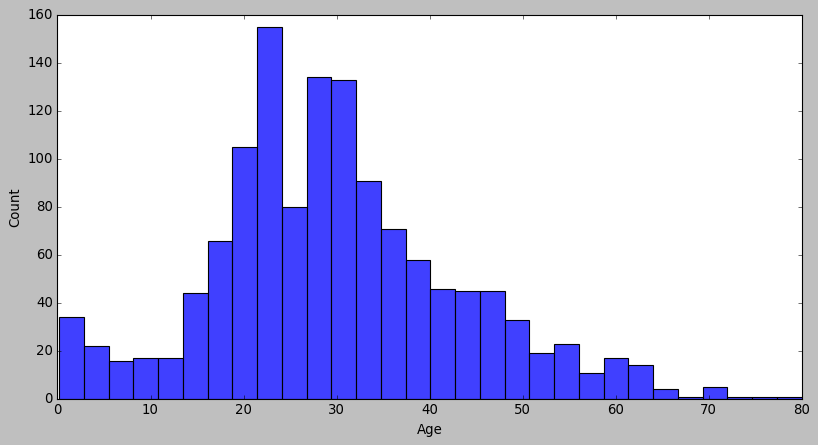

In [11]:
# We can also use Seaborn to create a histogram (like the one we created with Matplotlib before the bins exercise)

sns.histplot(x='Age', data=titanic)
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

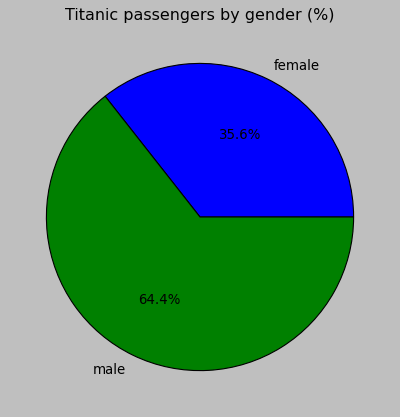

In [13]:
# Matplotlib: 
# One of the best solutions to show the distribution between 2 values is the pie chart

# First we create a smaller df with the data we need (number of passengers aggregated by gender)
titanic_gender = titanic.groupby('Gender').agg({'PassengerId':'count'}).reset_index()
titanic_gender.rename(columns={'PassengerId':'Passengers'},inplace=True)
titanic_gender

# Then we can create the pie.
# Note: autopct='%1.1f%%' adds the percentage to each value in the labels
plt.pie(titanic_gender['Passengers'], labels=titanic_gender['Gender'], autopct='%1.1f%%')
plt.title('Titanic passengers by gender (%)')
plt.show()

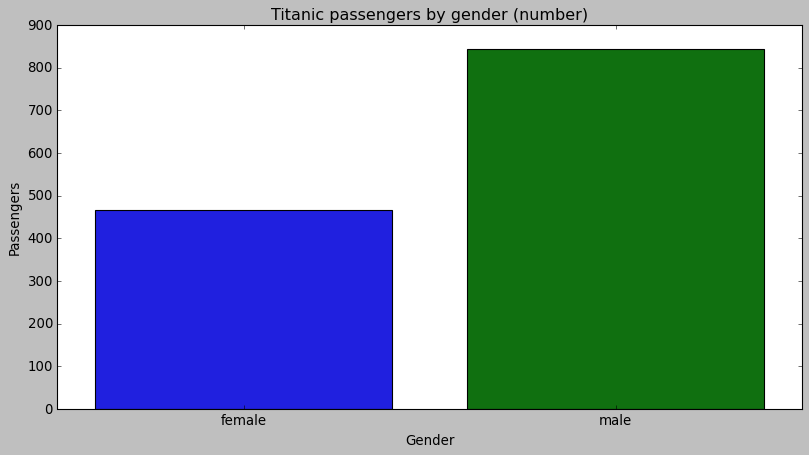

In [19]:
# We can also compare the values for gender using the bar plot with Seaborn
sns.barplot(x='Gender', y='Passengers', data=titanic_gender)
plt.title('Titanic passengers by gender (number)')
plt.show()

#### Use the right plot to visualize the column `Pclass`.

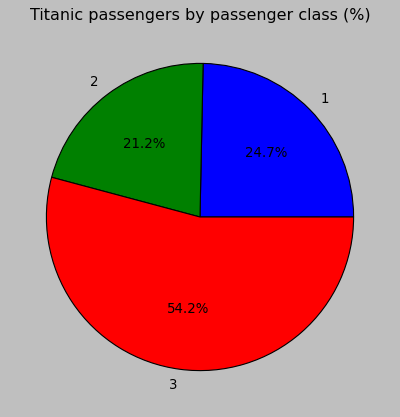

In [ ]:
titanic_class = titanic.groupby('Pclass').agg({'PassengerId':'count'}).reset_index()
titanic_class.rename(columns={'PassengerId':'Passengers'},inplace=True)
titanic_class

plt.pie(titanic_class['Passengers'], labels=titanic_class['Pclass'], autopct='%1.1f%%')
plt.title('Titanic passengers by passenger class (%)')
plt.show()


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [ ]:
"""
In my opinion, the best type of plot to show age distribution is the boxplot. 
Originally, I used the boxplot for another exercise before, so for this exercise I followed a different approach and used the summary statistics 
extracted from the describe().
I am adding below the 2 options: the boxplot and the solution to get the summary statistics from describe().
"""

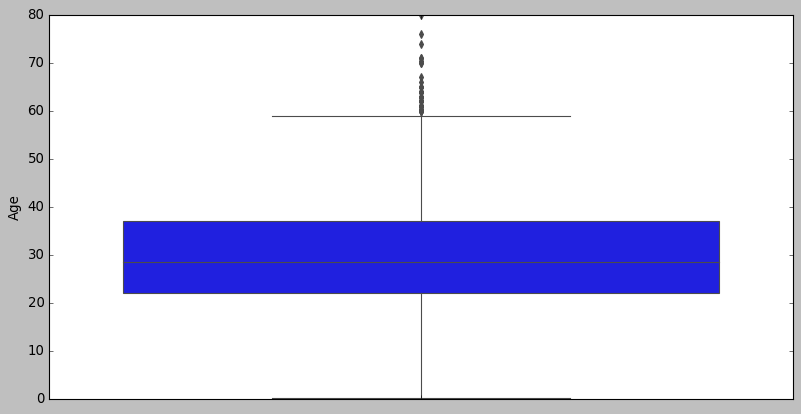

In [12]:
# Solution 1
sns.boxplot(y='Age', data=titanic)
plt.show()

In [ ]:
# Solution 2: I did this when I thought I could not reuse the solution of the boxplot.
# It is more complex and it takes the data of all summary statistics for the feature Age.

In [ ]:
# First we can create a new df with all summary statistics for the feature Age
titanic_age_stats = pd.DataFrame(titanic['Age'].describe())
titanic_age_stats.reset_index(inplace=True)

In [ ]:
titanic_age_stats = titanic_age_stats.iloc[1: , :] #removing total count from rows, as not relevant for the chart
titanic_age_stats.rename(columns={'index':'measure'},inplace=True)  #changing the name of the column for clarity
titanic_age_stats

,measure,Age
1,mean,29.879186
2,std,13.448335
3,min,0.170000
4,25%,22.000000
5,50%,28.500000
6,75%,37.000000
7,max,80.000000


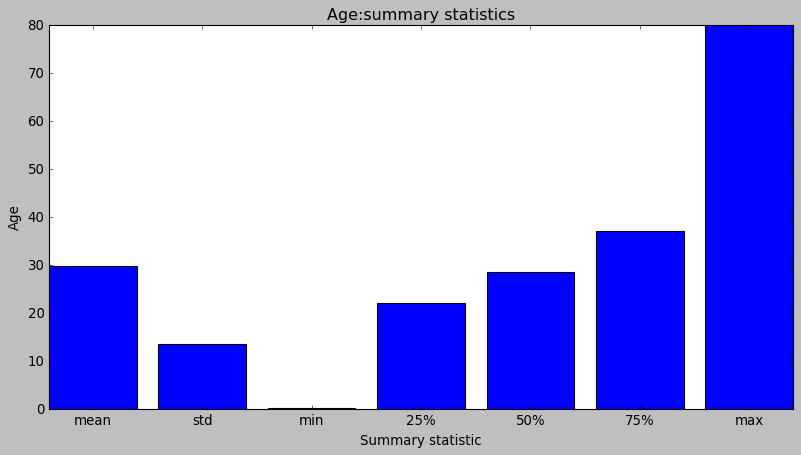

In [ ]:
# Now we can represent the summary statitistics in a bar plot, for example:
plt.bar(titanic_age_stats['measure'],titanic_age_stats['Age'])
plt.title('Age:summary statistics')
plt.xlabel('Summary statistic')
plt.ylabel('Age')
plt.show()

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
Compared to other plots, the bloxpot allows us to see better where most of the values are concentrated. But more importantly, compared to other 
plots we see in a much clearer way where the outliers are (some outliers above 60 may impact the summary statistics).
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

Text(0.5, 1.0, 'Age:summary statistics')

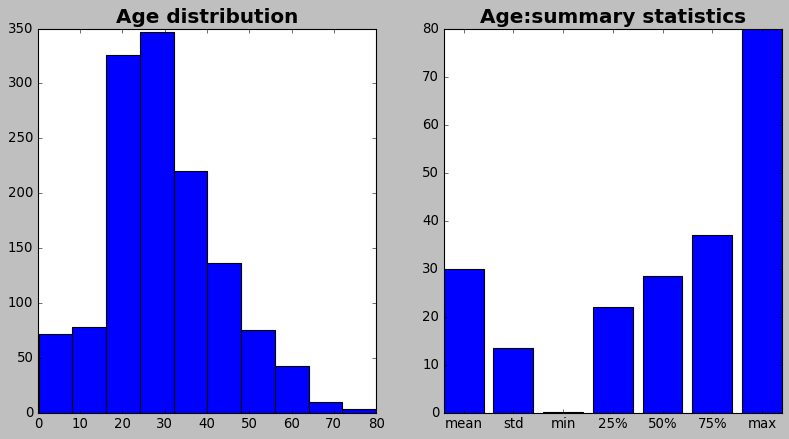

In [ ]:
# Note: Here I produced two subplots together showing side-by-side
# the same plots I have already produced before. I used the summary statistics in solution 2 instead of the summary statistics I obtained from
# the boxplot, but the exact same solution could be used showing in one of the subplots the boxplot instead.

fig, [ax1, ax2] = plt.subplots(1,2)
ax1.hist(titanic['Age'])
ax1.set_title('Age distribution',fontweight="bold", size=18) 
ax2.bar(titanic_age_stats['measure'],titanic_age_stats['Age'])
ax2.set_title('Age:summary statistics',fontweight="bold", size=18)


#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
It does not provide much additional information because we have already seen both plots before, but having both
plots side-to-side makes it easier to analyze them and provides more visibility.
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

<function matplotlib.pyplot.show(close=None, block=None)>

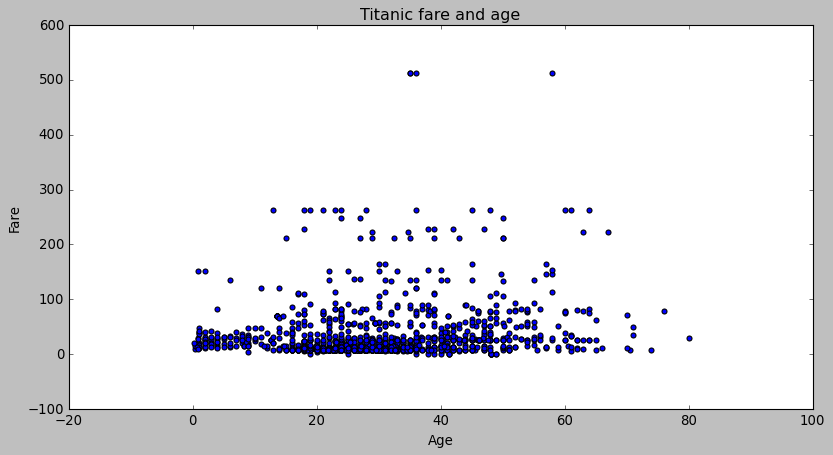

In [ ]:
# Method 1 - matplotlib
plt.scatter(titanic['Age'], titanic['Fare'])
plt.title('Titanic fare and age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

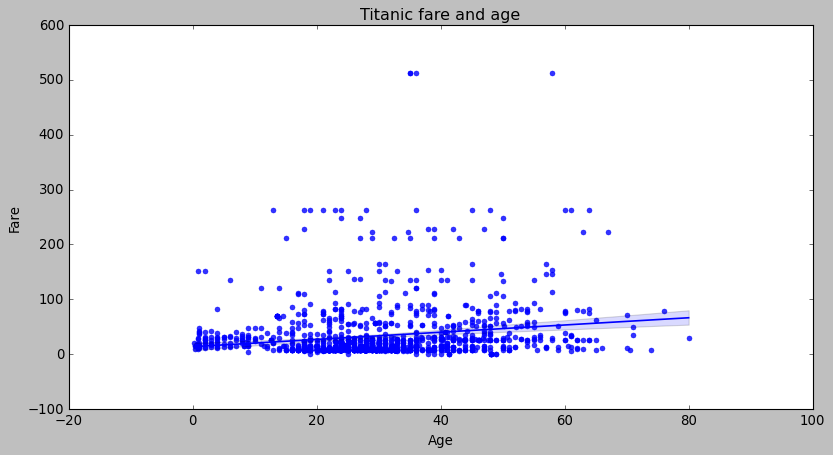

In [ ]:
# Method 2 - seaborn
sns.regplot(x="Age", y="Fare", data=titanic)
plt.title('Titanic fare and age')
plt.show

In [ ]:
# The relationship is not seen very clearly, as most passengers of all ages traveled with cheap fares, and
# the plot is affected by some outliers with 3 very expensive tickets.
# For a better analysis, we could first drop the rows with those outliers.
# In any case, we can see a slight trend in which senior passengers are more likely to buy more 
# expensive tickets. Younger passengers are more likely to travel with cheaper fares.

#### Plot the correlation matrix using seaborn.

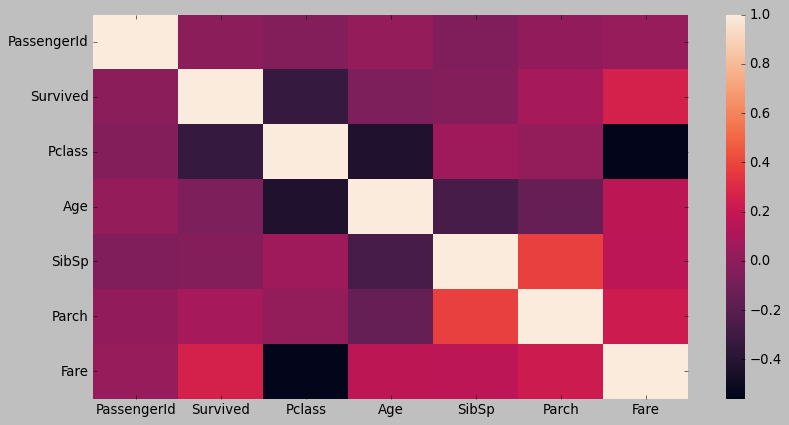

In [21]:
only_numeric = titanic.select_dtypes(include = np.number)
corr = only_numeric.corr()
sns.heatmap(corr)
plt.show()

/var/folders/ym/cxv9j3js63z_00t5k8szn1ww0000gn/T/ipykernel_43236/4239897613.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool)) # can remove this to have the full matrix


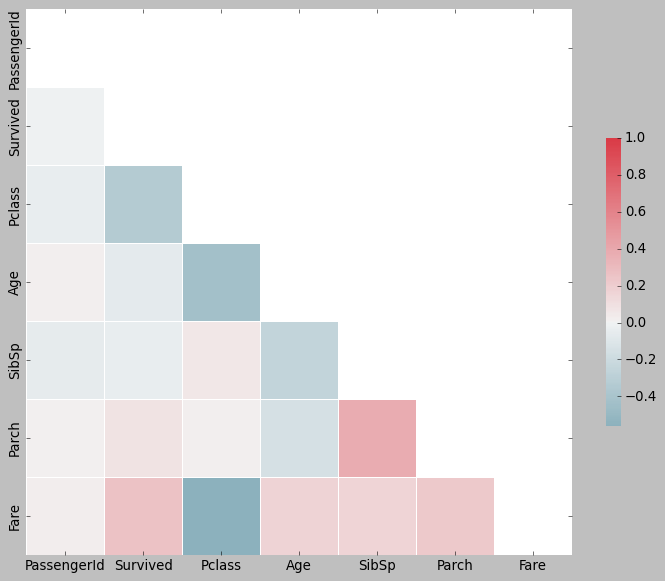

In [22]:
# We can make this prettier and clearer with the following script:

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=np.bool)) # can remove this to have the full matrix
# np.triu - makes an array which the upper right part of the rectangle is true and the bottom left is false  

#the colors you like
cmap = sns.diverging_palette(220, 10, as_cmap=True)

## the plot
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

#### What are the most correlated features?

In [ ]:
"""
- There is a strong correlation between the number of parents/children and the number of siblings, which makes
sense because families traveling together often met both criteria. 
- There is also a (not strong) correlation between the fare and factors like the number of parents/children,
the age and the number of siblings. This may seem because according to research fares were calculated for groups 
(e.g. all individuals of the family would travel with one family ticket with a certain fare). 
- There is also a correlation between the fare paid and the chances to survive (suprisingly, there is no
correlation between the passenger class and the chances to survive). This may be impacted again by the fact that 
families traveled together with the same fare. Because women and children had a higher chance to survive, we see 
a correlation between the fare (families with same tickets) and the number of survivors.

It is somewhat unexpected that there is no correlation at all between passenger class and fares. 
As explained before, this may be caused because fares were calculated per family members
traveling with the same ticket (not individual tickets). Also, there are some passengers
in higher classes who did not pay the full price for their tickets. 
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# Here again I interpreted initially the meaning of summary statistics as we get them from describing the column (mean, standard deviation, etc.)
# I am providing below the solution I worked on based on that idea, but this could be done in a much easier way using boxplots. 
# In any case, the solution below shows how we can compare 3 subplots side-by-side.

In [24]:
# Here we create a df for each Pclass showing the summary statistics of Age 

titanic_pclass1 = pd.DataFrame(titanic['Age'].where(titanic['Pclass']==1).describe())
titanic_pclass1.reset_index(inplace=True)
titanic_pclass1 = titanic_pclass1.iloc[1: , :] #removing total count from rows, as not relevant for the chart
titanic_pclass1.rename(columns={'index':'measure'},inplace=True)

titanic_pclass2 = pd.DataFrame(titanic['Age'].where(titanic['Pclass']==2).describe())
titanic_pclass2.reset_index(inplace=True)
titanic_pclass2 = titanic_pclass2.iloc[1: , :] #removing total count from rows, as not relevant for the chart
titanic_pclass2.rename(columns={'index':'measure'},inplace=True)

titanic_pclass3 = pd.DataFrame(titanic['Age'].where(titanic['Pclass']==3).describe())
titanic_pclass3.reset_index(inplace=True)
titanic_pclass3 = titanic_pclass3.iloc[1: , :] #removing total count from rows, as not relevant for the chart
titanic_pclass3.rename(columns={'index':'measure'},inplace=True)

In [25]:
titanic_pclass1 # checking values

,measure,Age
1,mean,39.555048
2,std,13.863639
3,min,0.920000
4,25%,30.000000
5,50%,40.000000
6,75%,49.000000
7,max,80.000000


Text(0.5, 1.0, 'Age statistics, Pax Class 3')

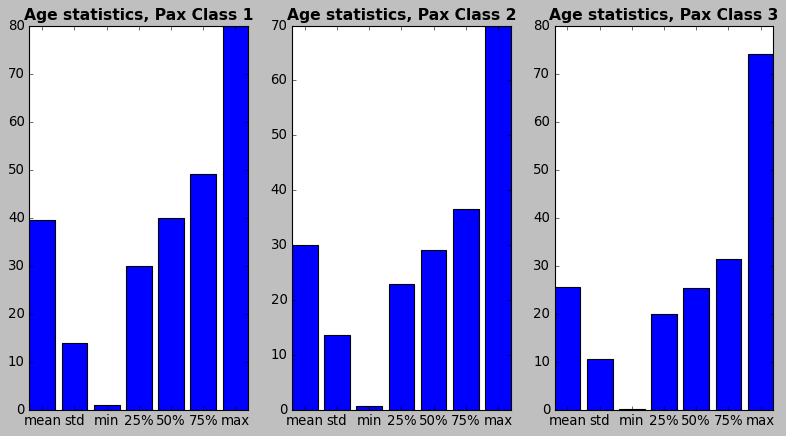

In [ ]:
# Here we are creating subplots (side-by-side) for comparison

fig, [ax1, ax2, ax3] = plt.subplots(1,3)
ax1.bar(titanic_pclass1['measure'], titanic_pclass1['Age'])
ax1.set_title('Age statistics, Pax Class 1',fontweight="bold", size=14) 
ax2.bar(titanic_pclass2['measure'], titanic_pclass2['Age'])
ax2.set_title('Age statistics, Pax Class 2',fontweight="bold", size=14)
ax3.bar(titanic_pclass3['measure'], titanic_pclass3['Age'])
ax3.set_title('Age statistics, Pax Class 3',fontweight="bold", size=14)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

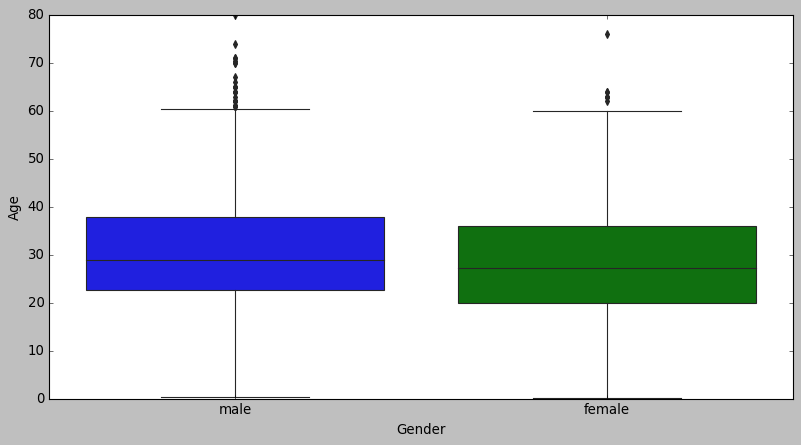

In [30]:
sns.boxplot(x='Gender', y='Age', data=titanic)